<a href="https://colab.research.google.com/github/Manasa9391/BDI_CIAFR10/blob/master/CNN_Experiment_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING KERAS AND CIFAR-10 DATASET

In [0]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [20]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


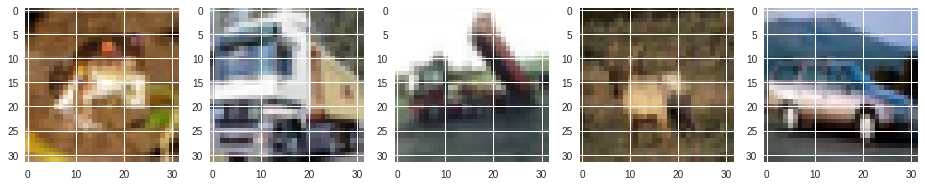

In [21]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [0]:
# A simple CNN Model fr CIFAR-10

In [0]:
import keras 
from keras.models import Sequential
from keras.layers import  Conv2D, MaxPooling2D, Dense, Flatten,Dropout,Activation
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np
from keras import regularizers
from keras.datasets import cifar10
from keras.optimizers import SGD 

In [23]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print('Shape of training dataset :',x_train.shape)
print('Shape of testing dataste :' ,x_test.shape)

#formatting the dataset 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

Shape of training dataset : (50000, 32, 32, 3)
Shape of testing dataste : (10000, 32, 32, 3)


In [0]:
model = Sequential()

weight_decay  = 0.0003
weight_decay_1= 0.0001  
#layer1
model.add(Conv2D(32,(3,3),input_shape=[32,32,3],kernel_regularizer=regularizers.l1(weight_decay_1),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#layer2
model.add(Conv2D(32,(3,3),kernel_regularizer=regularizers.l1(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

#layer 3
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l1(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))


#layer4
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l1(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

#layer5


model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l1(0.0003),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#layer6

model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l1(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


In [0]:
model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))


In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
__________

In [0]:

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.2,
                              patience=15, min_lr=0.001)


In [0]:
SGD = SGD(lr=0.01, decay=1e-6, momentum=0.9)

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip = False)


In [0]:
datagen.fit(X_train)

In [33]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) / 32, epochs=20,
                    validation_data = (x_test,y_test),callbacks= [reduce_lr])


Epoch 1/20
1563/1562 [==============================] - 92s 59ms/step - loss: 1.0880 - acc: 0.7760 - val_loss: 1.0451 - val_acc: 0.7981
Epoch 2/20
1563/1562 [==============================] - 90s 58ms/step - loss: 1.0874 - acc: 0.7772 - val_loss: 1.1126 - val_acc: 0.7723
Epoch 3/20
1563/1562 [==============================] - 91s 58ms/step - loss: 1.0848 - acc: 0.7781 - val_loss: 1.0225 - val_acc: 0.8071
Epoch 4/20
1563/1562 [==============================] - 93s 60ms/step - loss: 1.0859 - acc: 0.7770 - val_loss: 1.0316 - val_acc: 0.7997
Epoch 5/20
1563/1562 [==============================] - 91s 58ms/step - loss: 1.0845 - acc: 0.7779 - val_loss: 1.0580 - val_acc: 0.7964
Epoch 6/20
1563/1562 [==============================] - 93s 60ms/step - loss: 1.0873 - acc: 0.7771 - val_loss: 1.0855 - val_acc: 0.7786
Epoch 7/20
1563/1562 [==============================] - 92s 59ms/step - loss: 1.0845 - acc: 0.7794 - val_loss: 1.0868 - val_acc: 0.7876
Epoch 8/20
1563/1562 [==========================

In [34]:
model.predict(x_test)

array([[1.9127525e-05, 1.2630621e-04, 2.2596057e-04, ..., 6.9269749e-06,
        2.2379613e-04, 4.4408833e-05],
       [2.3147517e-05, 3.8642127e-02, 5.0849408e-06, ..., 6.6225269e-08,
        9.6106070e-01, 2.4561654e-04],
       [7.4947740e-05, 3.4226859e-01, 6.2910054e-05, ..., 2.1801002e-06,
        6.5519387e-01, 5.7672145e-04],
       ...,
       [2.1047711e-06, 5.6481838e-08, 6.4940366e-04, ..., 1.1268087e-03,
        5.5262888e-05, 5.7566854e-06],
       [1.1084726e-03, 9.9540305e-01, 2.8320404e-05, ..., 4.5167335e-06,
        3.5369630e-05, 1.2582574e-03],
       [2.1761361e-08, 4.0136863e-09, 1.6628488e-05, ..., 9.8328179e-01,
        6.8949335e-09, 1.7447890e-09]], dtype=float32)

In [35]:
scores=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 255us/step


In [37]:
scores

[1.2069485488891603, 0.7589]

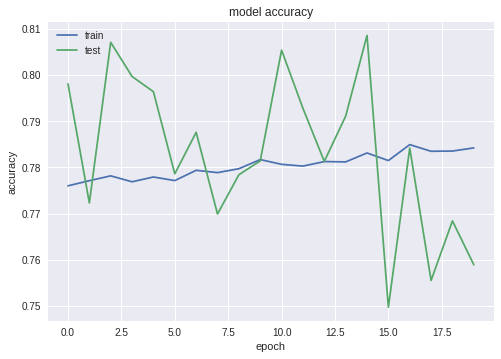

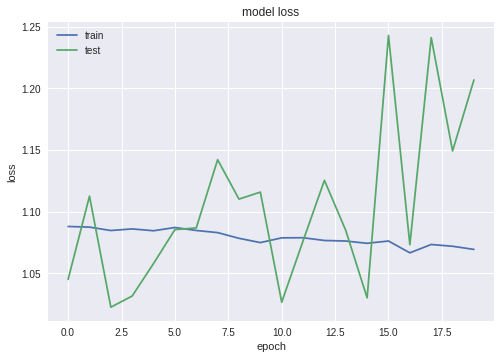

In [38]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()